In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.isnull().sum()

there are significant amount of null values in CustomerID column. Having considering the project's scope, i.e to explore differnt ML models, im just ignore it.

In [ ]:
df['Country'].unique()

# Knowing the metrics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

since this project based on sales optimization, we can safely assume revenue is what we need to maximize so lets understand the current state of revenue

# Understanding Revenue

In [10]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [11]:
df.groupby('Month')['Revenue'].sum()

Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: Revenue, dtype: float64

although this approach is an appropriate way to figure the revenue, we need to take into account that the 12th month is repeated twice so we need to figure a way around it

In [12]:
#df.groupby('MonthYear')['Revenue'].sum()

In [13]:
df.groupby('Country')['Revenue'].sum()

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

In [14]:
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

In [15]:
df_revenue_month = df.groupby(['MonthYear'])['Revenue'].sum().reset_index()
df_revenue_month

,MonthYear,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


In [16]:
df_revenue_country = df.groupby(['Country'])['Revenue'].sum().sort_values(ascending=False).astype(int).reset_index()
df_revenue_country

,Country,Revenue
0,United Kingdom,8187806
1,Netherlands,284661
2,EIRE,263276
3,Germany,221698
4,France,197403
5,Australia,137077
6,Switzerland,56385
7,Spain,54774
8,Belgium,40910
9,Sweden,36595


In [ ]:
import seaborn as sns
sns.set(style='darkgrid',
        palette='viridis',
        font_scale=1,
        font='calibri',
        rc={'figure.figsize':(8,4), "legend.fontsize": 14})

sns.set_context("paper", rc={
    "lines.linewidth": 1.5,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})
sns.set_style({'grid.color': '.95', 'axes.edgecolor': '.3'})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot - Monthly Revenue
sns.barplot(x=df_revenue_month['MonthYear'], y=df_revenue_month['Revenue'], palette='viridis', ax=axs[0])
axs[0].set_xlabel('Month-Year')
axs[0].set_ylabel('Revenue')
axs[0].set_title('Monthly Revenue')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second subplot - Revenue by Country
sns.barplot(x=df_revenue_country['Revenue'], y=df_revenue_country['Country'], palette='viridis', ax=axs[1])
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Revenue by Country')
axs[1].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


well we can see that UK has the most records and as per the suggestions from internet, we can just go ahead with the UK customers

# Monthly growth rate

In [ ]:
df_revenue_month['Growth_rate'] = df['Revenue'].pct_change()
df_revenue_month

In [ ]:
df_growth_rate_plot = df_revenue_month.iloc[1:]

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot using seaborn
sns.barplot(data=df_growth_rate_plot, x='MonthYear', y='Growth_rate', palette='viridis')

# Customize the plot
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Filtering country with highest customer base

In [ ]:
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)

# Monthly active customers

In [ ]:
df_active = df_uk.groupby('MonthYear')['CustomerID'].nunique().reset_index()
df_active

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_active, x='MonthYear', y='CustomerID', palette='viridis')

# Monthly Order Count

In [ ]:
df_order = df_uk.groupby('MonthYear')['Quantity'].sum().reset_index()

In [ ]:
df_order

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_order, x='MonthYear', y='Quantity', palette='viridis')

# Average Revenue Per Order

In [ ]:
df_avg_rev = df_uk.groupby('MonthYear')['Revenue'].mean().reset_index()

In [ ]:
df_avg_rev

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_avg_rev, x='MonthYear', y='Revenue', palette='viridis')

In [ ]:
df_cusID_min = df_uk.groupby('CustomerID')['InvoiceDate'].min().reset_index()

In [ ]:
df_cusID_min.columns = ['CustomerID', 'MinPurchaseDate']

In [ ]:
df_cusID_min['MinPurchaseMonthYear'] = df_cusID_min['MinPurchaseDate'].dt.to_period('M')

In [ ]:
df_cusID_min.head()

In [ ]:
df_uk = pd.merge(df_uk, df_cusID_min, on='CustomerID' )

In [ ]:
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['MonthYear']>df_uk['MinPurchaseMonthYear'],'UserType'] = 'Existing'

In [ ]:
df_user_type_revenue['MonthYear'] = df_user_type_revenue['MonthYear'].astype(str)

In [ ]:
df_user_type_revenue = df_uk.groupby(['MonthYear','UserType'])['Revenue'].sum().reset_index()
df_user_type_revenue

In [ ]:
df_user_type_plot = df_user_type_revenue.loc[1:22]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_user_type_plot,
            x='MonthYear',
            y='Revenue',
           hue='UserType',
            palette='cubehelix')


In [ ]:
df_user_type_plot.head()

# New User Ratio

In [ ]:
df_new_user_ratio = (df_uk.query("UserType == 'New'").groupby(['MonthYear'])['CustomerID'].nunique() / df_uk.query("UserType == 'Existing'").groupby(['MonthYear'])['CustomerID'].nunique()).round(2)
df_new_user_ratio = df_new_user_ratio.reset_index()

In [ ]:
df_new_user_ratio.columns = ['MonthYear', 'New_Cus_Ratio']

In [ ]:
df_new_user_ratio.dropna()

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df_new_user_ratio,
            x = 'MonthYear',
            y = 'New_Cus_Ratio',
            palette = 'cubehelix')

In [ ]:
df_new_user_ratio['MonthYear'] = df_new_user_ratio['MonthYear'].astype(str)

# User Retention

In [ ]:
df_uk_purchase = df_uk.groupby(['MonthYear','CustomerID'])['Revenue'].sum().reset_index()

In [ ]:
df_retention = pd.crosstab(df_uk_purchase['CustomerID'],
            df_uk_purchase['MonthYear']).reset_index()

In [ ]:
months = df_retention.columns[2:]

In [ ]:
months

In [ ]:
retention_array = []
prev_month = None

for selected_month in months:
    retention_data = {}
    retention_data['MonthYear'] = int(selected_month.year * 100 + selected_month.month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    
    if prev_month is not None:
        retained_users = df_retention[(df_retention[selected_month] > 0) & (df_retention[prev_month] > 0)][selected_month]
        retention_data['RetainedUserCount'] = retained_users.sum()
    
    retention_array.append(retention_data)
    prev_month = selected_month


In [ ]:
df_retention_month = pd.DataFrame(retention_array)

In [ ]:
df_retention_month = df_retention_month[1:]

In [ ]:
df_retention_month

In [ ]:
df_retention_month['RetentionRate'] = df_retention_month['RetainedUserCount']/df_retention_month['TotalUserCount']

In [ ]:
df_retention_month = df_retention_month[:-1]

In [ ]:
sns.lineplot(data = df_retention_month, 
           x='MonthYear',
           y='RetentionRate',
           palette = 'Blues')

# Churn Rate

In [ ]:
df_retention_month.loc[:, 'ChurnRate'] = 1 - df_retention_month['RetentionRate']

In [ ]:
df_retention_month

In [ ]:
sns.lineplot(data = df_retention_month, 
            x='MonthYear',
            y='ChurnRate',
            palette = 'Blues')

plt.tight_layout

# Customer Segmentation

In [17]:
df = df.drop(['Day','Month','Week','Year'], axis = 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
 9   MonthYear    541909 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 41.3+ MB


In [19]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [20]:
df[['Date', 'Time']] = pd.DataFrame({'Date': df['InvoiceDate'].dt.date, 'Time': df['InvoiceDate'].dt.time})

In [21]:
df['MonthYear'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')

In [22]:
df = df.drop("InvoiceDate", axis = 1)

# Recency

In [39]:
df_uk = df.query("Country == 'United Kingdom'")

In [40]:
df_user = pd.DataFrame(df_uk["CustomerID"].unique())
df_user.columns = ["CustomerID"]

In [25]:
# group all the customer id's with the most recent purchase
df_maxPurchase = df_uk.groupby("CustomerID")["Date"].max().reset_index()

In [26]:
df_maxPurchase.columns = ["CustomerID","MaxPurchaseDate"]

In [27]:
#we take our observation point as the max invoice date in our dataset
df_maxPurchase['Recency'] = (df_maxPurchase['MaxPurchaseDate'].max() - df_maxPurchase['MaxPurchaseDate']).dt.days

In [28]:
df_maxPurchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [29]:
df_maxPurchase["Recency"].describe()

count    3950.000000
mean       91.323038
std       100.236848
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

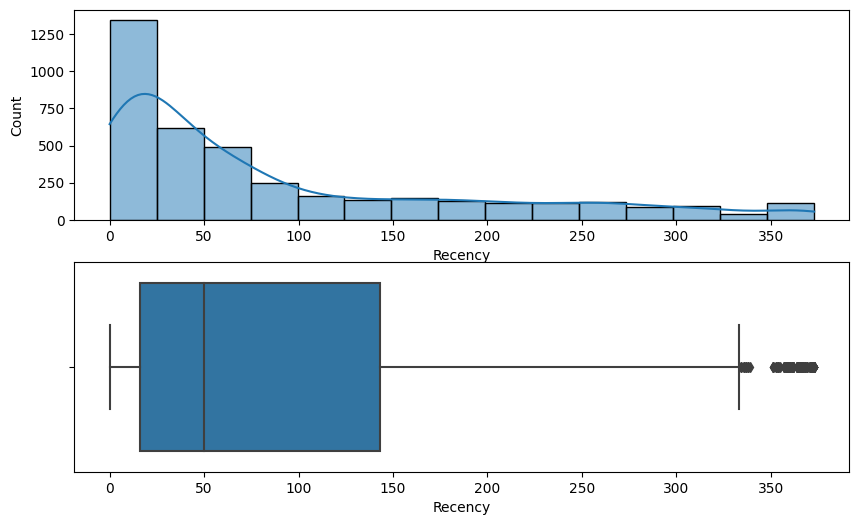

<Figure size 640x480 with 0 Axes>

In [30]:
fig, axes = plt.subplots(2, figsize=(10, 6))

sns.histplot(data=df_maxPurchase,
             x='Recency',
             bins=15,
             kde=True,
             ax=axes[0])

sns.boxplot(data=df_maxPurchase,
            x='Recency',
            ax=axes[1])

plt.show()
plt.tight_layout()

In [37]:
df_user = pd.merge(df_user, df_maxPurchase[['CustomerID','Recency']], on='CustomerID')

In [43]:
df_user.head()

,CustomerID,Recency
0,17850.0,302
1,13047.0,31
2,13748.0,95
3,15100.0,330
4,15291.0,25


# elbow method and inertia graph

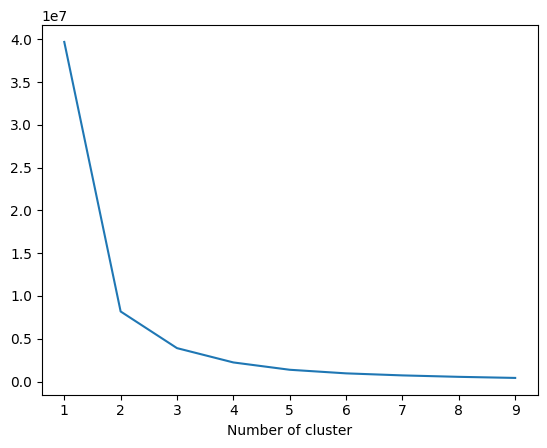

In [61]:
from sklearn.cluster import KMeans

sse={}
df_recency = df_user[['Recency']]
for k in range(1, 10): #choice of the range is arbitrary
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init = 'auto').fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [63]:
df_recency

,Recency,clusters
0,302,1
1,31,4
2,95,2
3,330,1
4,25,4
...,...,...
3945,2,0
3946,1,0
3947,1,0
3948,1,0


In [64]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4).fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('RecencyCluster', 'Recency',df_user,False)

D:\Data_Analysis\Data-analysis-learning\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
df_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,480.0,304.668750,41.322913,245.0,267.0,301.0,336.25,373.0
1,566.0,184.973498,31.620611,133.0,157.0,184.0,212.00,243.0
2,954.0,78.257862,22.864594,49.0,60.0,73.0,94.00,131.0
3,1950.0,18.016410,13.254688,0.0,7.0,16.0,29.00,47.0


# Frequency

In [73]:
#get order counts for each user and create a dataframe with it
df_frequency = df_uk.groupby('CustomerID').Date.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']

In [75]:
#add this data to our main dataframe
df_user = pd.merge(df_user, df_frequency, on='CustomerID')

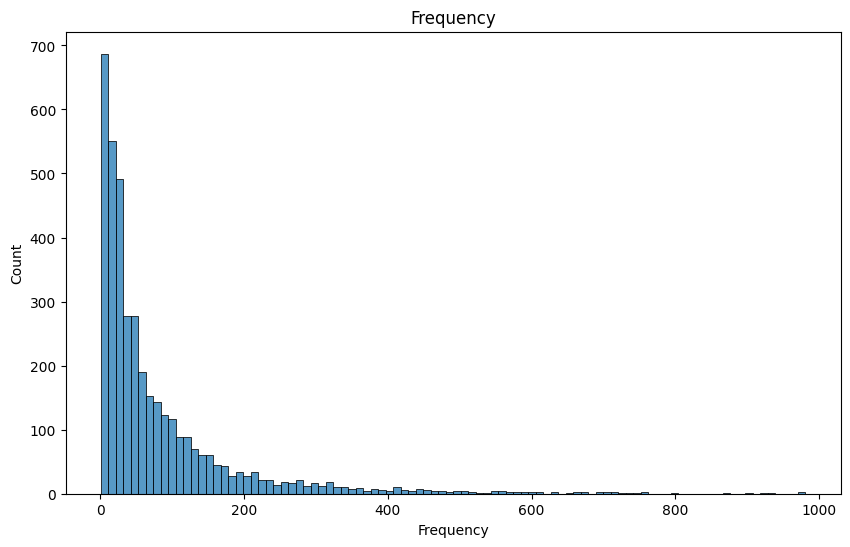

In [76]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df_user.query('Frequency < 1000'), x='Frequency')
plt.title('Frequency')
plt.show()

In [79]:
#k-means
kmeans = KMeans(n_clusters=4).fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

#order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True)

#see details of each cluster
df_user.groupby('FrequencyCluster')['Frequency'].describe()

D:\Data_Analysis\Data-analysis-learning\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


In [78]:
df_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,302,0,312,3
1,15100.0,330,0,6,0
2,18074.0,373,0,13,0
3,16250.0,261,0,24,0
4,13747.0,373,0,1,0
...,...,...,...,...,...
3945,15942.0,133,1,14,0
3946,14143.0,133,1,7,0
3947,16147.0,133,1,22,0
3948,15149.0,133,1,23,0


# Revenue

In [81]:
#calculate revenue for each customer
df_uk.loc[:, 'Revenue'] = df_uk['UnitPrice'] * df_uk['Quantity']
df_revenue = df_uk.groupby('CustomerID').Revenue.sum().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9968\2832655089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.loc[:, 'Revenue'] = df_uk['UnitPrice'] * df_uk['Quantity']


In [82]:
df_revenue

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34
...,...,...
3945,18280.0,180.60
3946,18281.0,80.82
3947,18282.0,176.60
3948,18283.0,2094.88


In [83]:
#merge it with our main dataframe
df_user = pd.merge(df_user, df_revenue, on='CustomerID')

In [84]:
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,302,0,312,1,5288.63
1,15808.0,306,0,210,1,3724.77
2,13047.0,31,3,196,1,3079.10
3,14688.0,7,3,359,1,5107.38
4,16029.0,38,3,274,1,50992.61


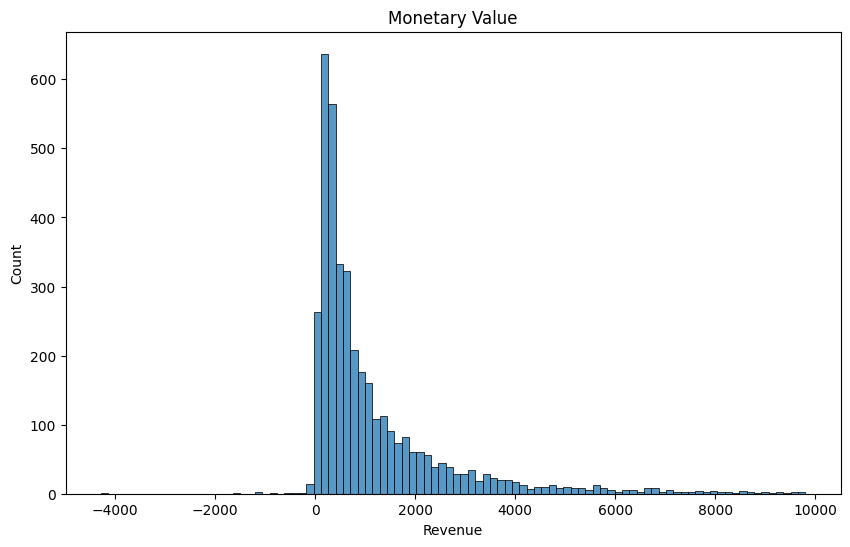

In [87]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df_user.query('Revenue < 10000'), x='Revenue')
plt.title('Monetary Value')
plt.show()

In [88]:
#apply clustering
kmeans = KMeans(n_clusters=4).fit(df_user[['Revenue']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])


#order the cluster numbers
df_user = order_cluster('RevenueCluster', 'Revenue', df_user, True)

#show details of the dataframe
df_user.groupby('RevenueCluster')['Revenue'].describe()

D:\Data_Analysis\Data-analysis-learning\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [89]:
#calculate overall score and use mean() to see details
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9968\3287717740.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()


,Recency,Frequency,Revenue
OverallScore,,,
0,304.852941,21.964286,302.914874
1,185.710714,32.660714,499.144180
2,79.571739,46.963043,868.082991
3,21.230973,68.419590,1091.416414
4,15.392617,271.755034,3607.097114
5,10.148649,373.290541,9136.946014
6,8.222222,876.037037,22777.914815
7,2.285714,1272.714286,103954.025714
8,1.666667,5917.666667,42177.930000


In [90]:
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'High-Value' 

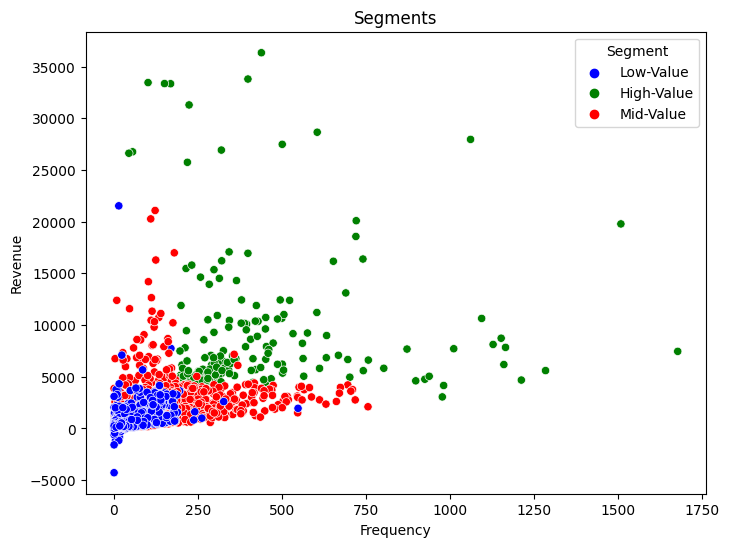

In [91]:
df_graph = df_user.query("Revenue < 50000 and Frequency < 2000")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_graph, x='Frequency', y='Revenue', hue='Segment', palette=['blue', 'green', 'red'])

plt.title('Segments')
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.show()


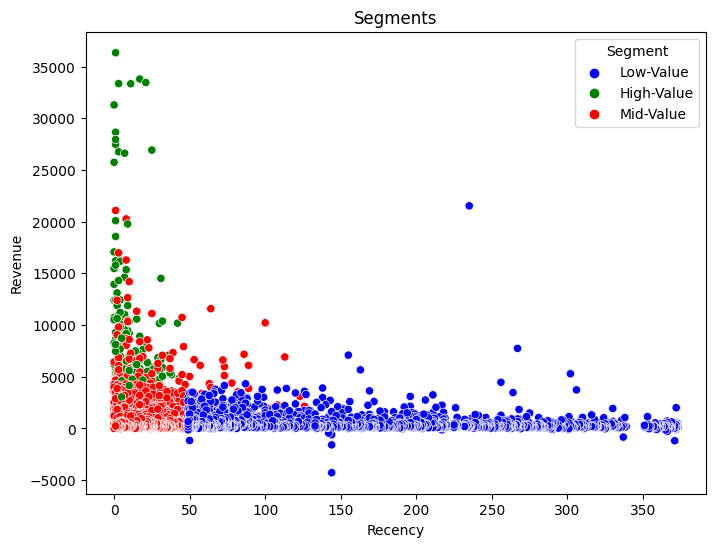

In [92]:
df_graph = df_user.query("Revenue < 50000 and Frequency < 2000")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_graph, x='Recency', y='Revenue', hue='Segment', palette=['blue', 'green', 'red'])

plt.title('Segments')
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.show()


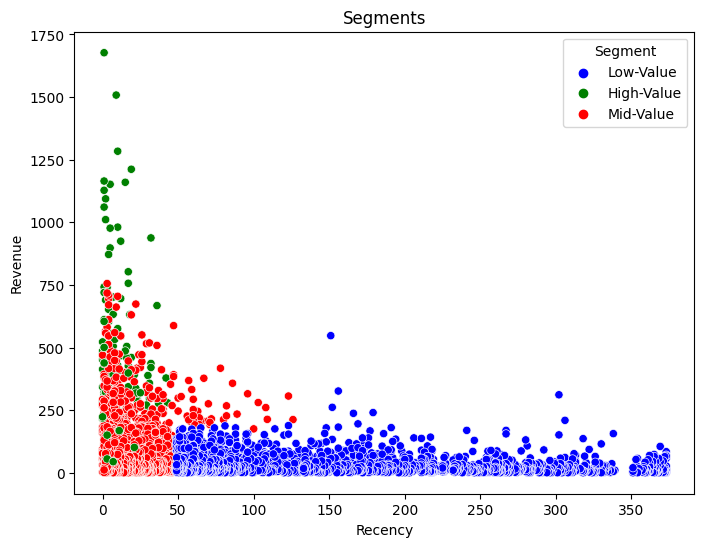

In [93]:
df_graph = df_user.query("Revenue < 50000 and Frequency < 2000")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_graph, x='Recency', y='Frequency', hue='Segment', palette=['blue', 'green', 'red'])

plt.title('Segments')
plt.xlabel('Recency')
plt.ylabel('Revenue')
plt.show()
